# Clustering Models
## K-means method
### Setting up for clustering analysis

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [ ]:
%matplotlib inline
plt.figure(figsize=(7,4))

In this lab we will work with iris dataset.

In [53]:
iris = datasets.load_iris()


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [54]:

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [55]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [56]:
variable_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

This is what our X data looks like. Now we are going to cluster this data.

## Building and running your model

In this section we will set the number of clusters and random number generator. Also, we need to fit our model to the data.

In [ ]:
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(X)

## Plotting your model outputs

Here we will plot the model output.

In [57]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

Now it is time to set the colour theme for our clusters. We set three colours.

Text(0.5, 1.0, 'K-Means Classification')

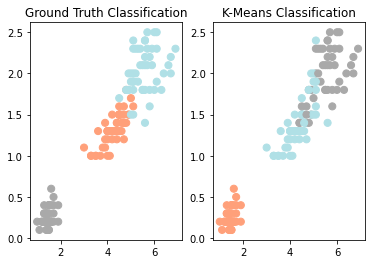

In [58]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

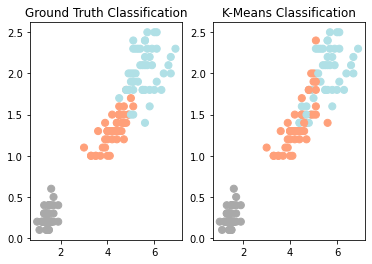

In [59]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

#### Question 1: What is the difference between Code cells In [7] and In [8]? Why have we done relabeling?

#### Question 2: What is the difference between Ground Truth Classification and K-Means Classification in the above figures?

## Evaluate your clustering results

In [60]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



#### Question 3: What do y and relabel represent in the print(classification_report(y, relabel)) command?

#### Question 4: What is precision and recall?